In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [18]:
n_levels = 4
root_point = (0, 0)
level_colors = ["C"+str(i) for i in range(n_levels)]

In [19]:
2**np.arange(n_levels)

array([1, 2, 4, 8])

In [39]:
def draw_tree(ax, n_levels, level_colors, root_point, height=3, width=3, marker_size=500, line_width=3):
    height_per_level = height/(n_levels-1)
    width_per_level = width/(2**(np.arange(n_levels)+1))
    leafs_per_level = 2**np.arange(n_levels)
    level_points = {}
    
    for level in range(n_levels):
        if level==0:
            ax.scatter(root_point[0], root_point[1], c=level_colors[level], s=marker_size, zorder=2)
            level_points[level] = [root_point,]
        else:
            level_width = width_per_level[level]
            new_y = level_points[level-1][0][1] - height_per_level
            this_level_points = []
            for pre_point in level_points[level-1]:
                left_point = (pre_point[0]-level_width, new_y)
                right_point = (pre_point[0]+level_width, new_y)
                this_level_points.append(left_point)
                this_level_points.append(right_point)
                ax.plot([left_point[0], pre_point[0]], [left_point[1], pre_point[1]], color="k", lw=line_width, zorder=0)
                ax.plot([right_point[0], pre_point[0]], [right_point[1], pre_point[1]], color="k", lw=line_width, zorder=0)
                ax.scatter(left_point[0], left_point[1], s=marker_size, c=level_colors[level], zorder=2)
                ax.scatter(right_point[0], right_point[1], s=marker_size, c=level_colors[level], zorder=2)
            level_points[level] = this_level_points

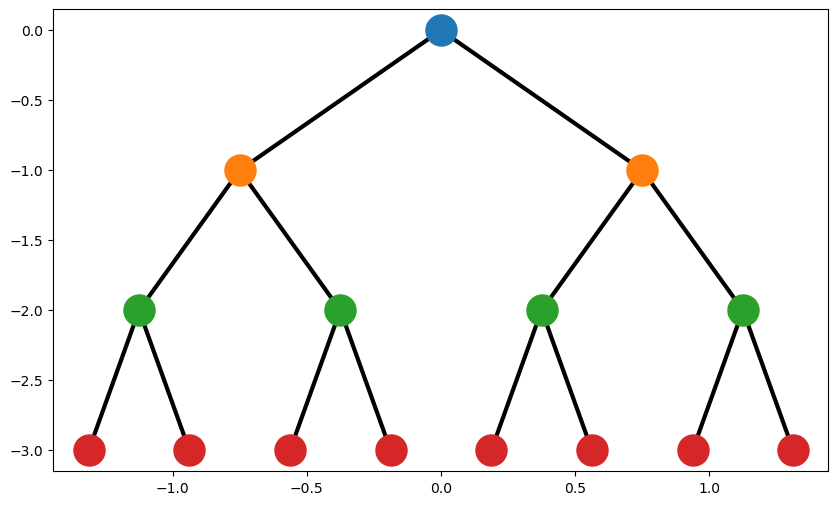

In [40]:
f, ax = plt.subplots(1, 1, figsize=(10, 6))
draw_tree(ax=ax, n_levels=n_levels, level_colors=level_colors, root_point=root_point)